# TP: is Batman somewhere?

Student: Henrique Figueiredo Conte

## 1.Analysis of the variables

In [1]:
myData <- read.table(file="bats.csv", sep=";", skip=3, header=T)
names(myData)

[1] "Species" "Diet"    "Clade"   "BOW"     "BRW"     "AUD"     "MOB"    
[8] "HIP"

## 2. Study of the relationship between brain weight and body mass

### Create a data table, named phyto, containing the different variables measured only for the phytophagous.

In [38]:
# Loading libraries first
library(ggplot2)
library(tidyverse)

ERROR: Error in library(corrplot): there is no package called ‘corrplot’


In [9]:
phyto=myData[(myData$Diet==1),]
show(phyto)

                       Species Diet Clade     BOW     BRW   AUD    MOB    HIP
1      Rousettus  aegyptiacus     1     I  136.30 2070.00  9.88 105.77 125.97
2          Epomops  franqueti     1     I  120.00 2210.00 10.44 107.80 159.80
3         Eonycteris  spelaea     1     I   58.70 1310.00  5.48  67.00  97.70
4          Cynopterus  sphinx     1     I   48.30 1184.33  4.77  65.27  95.40
5        Dobsonia  praedatrix     1     I  184.00 3028.00  7.09 213.43 233.30
6             Eidolon  helvum     1     I  262.00 4290.00 12.77 208.70 258.10
7          Pteropus  vampyrus     1     I 1014.00 9121.00 16.93 243.54 331.29
8      Macroglossus  miniumus     1     I   14.60  561.00  2.40  30.05  52.95
9     Syconycteris  australis     1     I   14.70  570.00  2.13  31.40  53.10
10      Nyctimene  albiventer     1     I   29.70  825.00  4.56  68.93  81.40
24   Brachyphylla  cavernarum     1    II   44.50 1196.00  8.63  42.20  78.80
25     Lionycteris  spurrelli     1    II    9.90  393.00  3.71 

### Then create a drawing that represents total brain weight as a function of body mass.

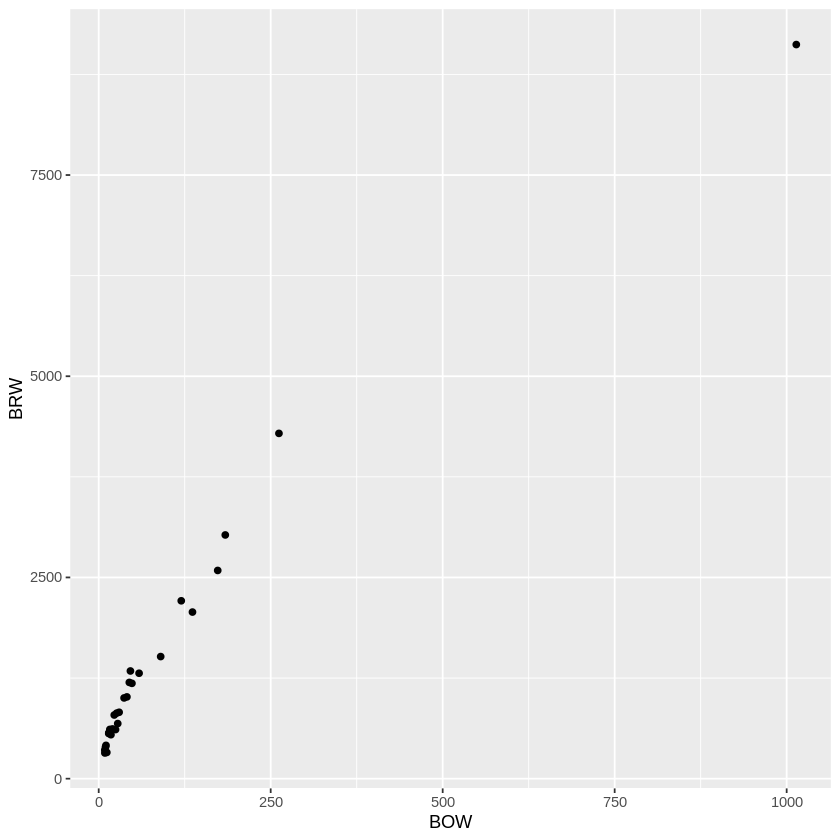

In [15]:
ggplot(data = phyto, aes(x = BOW, y = BRW)) + 
    geom_point()

### We propose to fit a simple regression model to explain total brain weight as a function of body mass.

In [17]:
reg1 = lm(BRW ~ BOW, data=phyto)

### Write in mathematical form the model estimated by R.

In [18]:
summary(reg1)


Call:
lm(formula = BRW ~ BOW, data = phyto)

Residuals:
    Min      1Q  Median      3Q     Max 
-628.32 -233.94  -65.74  158.26 1308.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 623.4469    81.4762   7.652 3.14e-08 ***
BOW           8.9999     0.3972  22.659  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 396.9 on 27 degrees of freedom
Multiple R-squared:   0.95,	Adjusted R-squared:  0.9482 
F-statistic: 513.4 on 1 and 27 DF,  p-value: < 2.2e-16


Matematical form = 9 * BOW + 623

### What is the estimate of the intercept?
623

### What is the value of the test statistics for the model test?

Bow: 8.999
p-value < 2e-16  
That means that BOW isn't 0 and we should keep it.  
Residual standard error: 396.9  

### What is the H0 hypothesis of this test?

The null hypotesis is if BOW is equal to 0. As we can see in its p-values (2e-16), we are sure that BOW isn't equal to 0.

### What can be said about the relationship between brain weight and body mass?

The brain weight is linear dependent of the body mass.

### How much is the coefficient of determination?

0.95

### We obtain the analysis of variance table with the command :

In [23]:
anova(reg1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
BOW,1,80888380,80888379.9,513.4154,4.208907e-19
Residuals,27,4253838,157549.6,NA,NA


### What additional information is presented in this table?

The residual about BOW.

### What is the sum of the residual squares?

4253838

### We can therefore draw the graph of the residuals according to the predicted values, like a diagnostic graph.

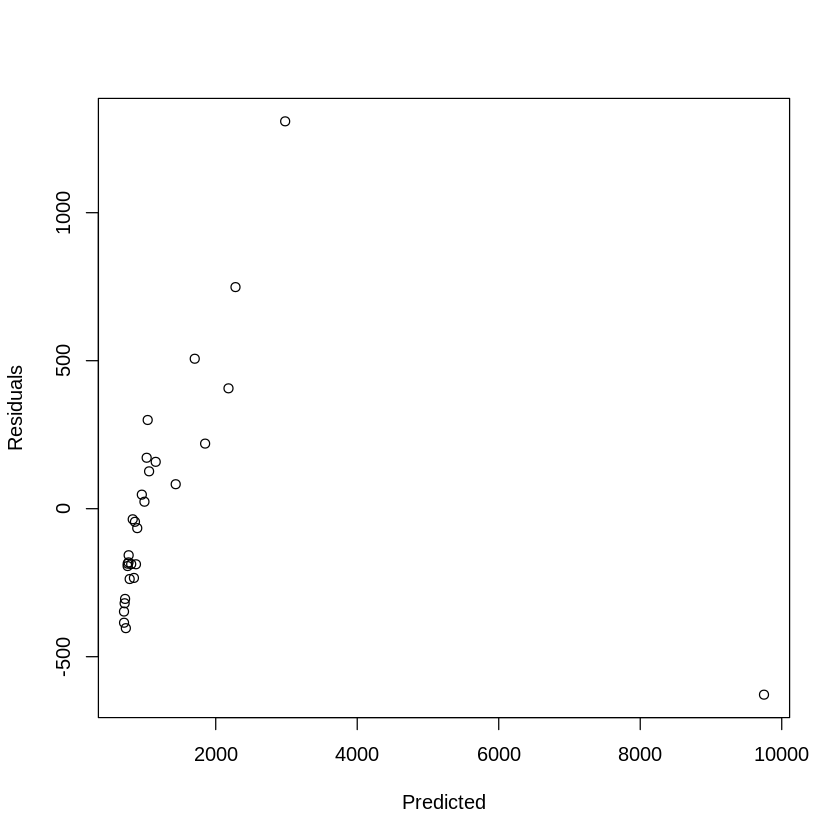

In [28]:
plot(reg1$fitted.values, reg1$residuals, xlab="Predicted", ylab="Residuals")

[1] 7


Call:
lm(formula = BRW ~ BOW, data = phytobis)

Residuals:
    Min      1Q  Median      3Q     Max 
-269.76  -93.33    8.73  112.93  322.55 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 346.5452    35.4920   9.764 3.48e-10 ***
BOW          14.5099     0.4285  33.860  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 141.8 on 26 degrees of freedom
Multiple R-squared:  0.9778,	Adjusted R-squared:  0.977 
F-statistic:  1147 on 1 and 26 DF,  p-value: < 2.2e-16


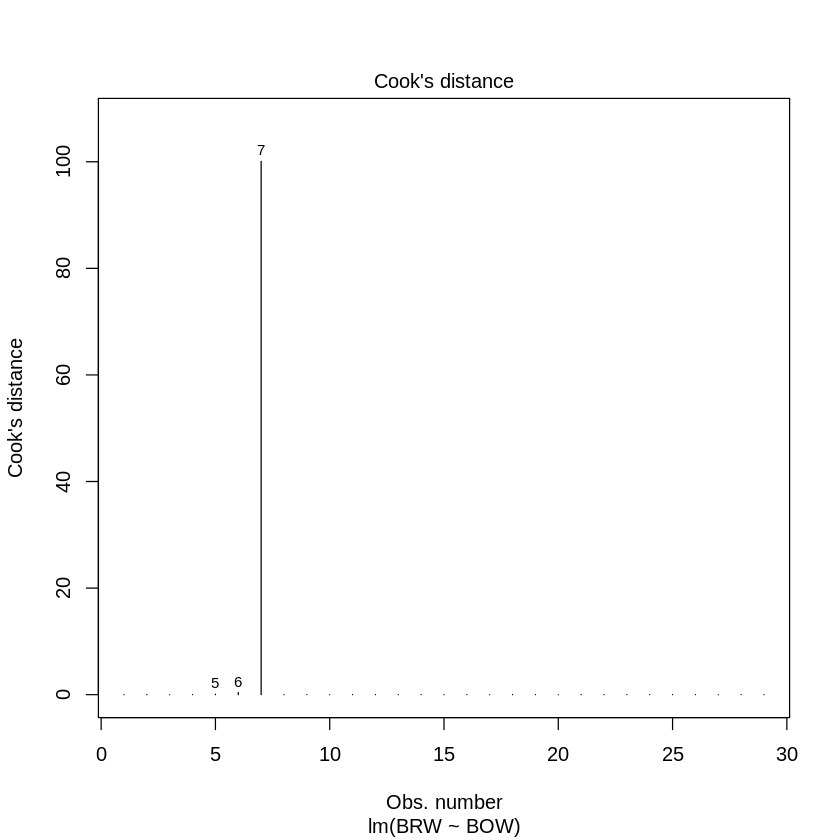

In [29]:
plot(reg1,4)
which(phyto$BRW>8000)
phytobis=phyto[which(phyto$BRW<8000),]
reg2 = lm(BRW ~ BOW, data=phytobis)
summary(reg2)

Without the outlier, we can see that BOW goes from 9 to 14.5! Besides, the coeffieicent of determination went from 0.95 to 0.9778. 

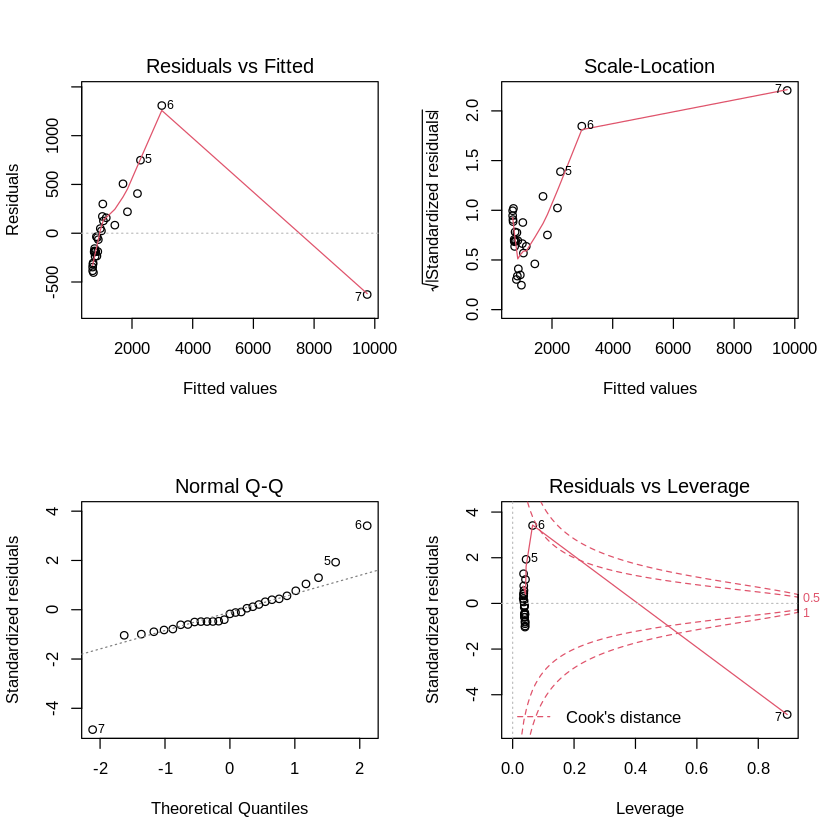

In [33]:
par(mfcol=c(2,2))
plot(reg1)

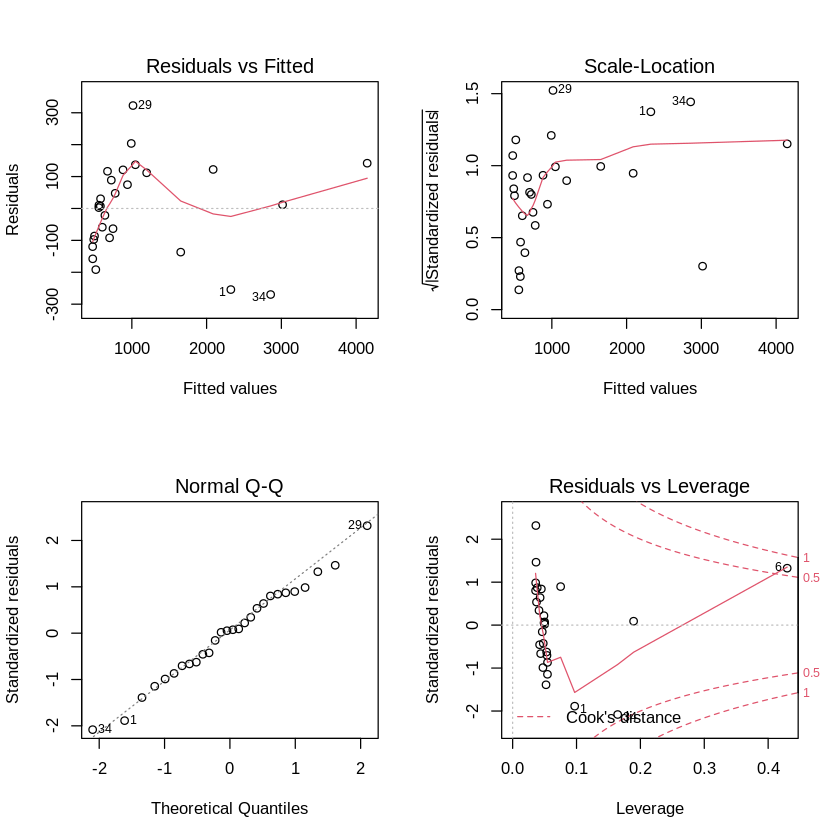

In [34]:
par(mfcol=c(2,2))
plot(reg2)

## 3. Study of the contribution to the total weight of each part of the brain

In this part, we try to understand the contribution of each part of the brain to the total weight. The variable to explain is the total weight of the brain (variable BRW). The potentially explanatory variables are the volume of the auditory part of the brain (variable AUD), the volume of the olfactory zone (MOB), and the volume of the hippocampus (HIP). Again, we work only with phytophagous species.

In [45]:
install.packages("corrplot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



We are initially interested in the correlations of the variables two by two. The cor function of R can be applied to an object of type data.frame if all the variables are of numerical type, and here we have factors. We will therefore create a new table containing only the variables of interest, calculate the correlation matrix and visualise it 

corrplot 0.92 loaded



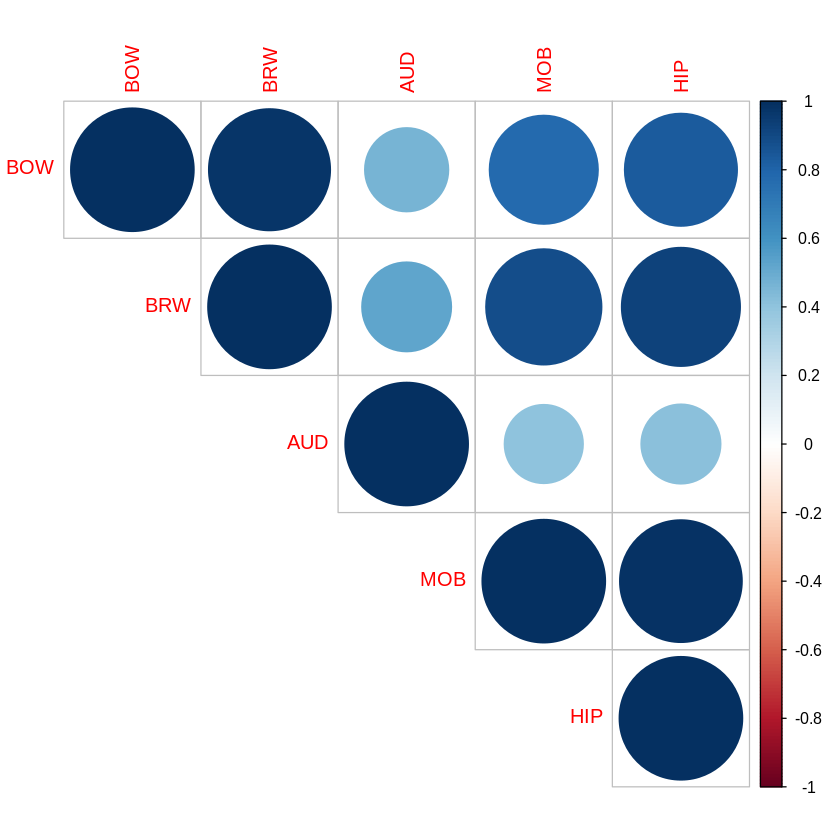

In [46]:
library(corrplot)

phytoNum=phyto[, c(4:8)]
mat.cor=cor(phytoNum)
corrplot(mat.cor, type="upper")

### Run the following Pearson tests. Such a test will have a large p-value in case of no correlation between two variables.

In [48]:
cor.test(phyto$BRW,phyto$HIP)
cor.test(phyto$BRW,phyto$MOB)
cor.test(phyto$BRW,phyto$AUD)


	Pearson's product-moment correlation

data:  phyto$BRW and phyto$HIP
t = 12.91, df = 27, p-value = 4.574e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8502663 0.9658107
sample estimates:
      cor 
0.9276811 



	Pearson's product-moment correlation

data:  phyto$BRW and phyto$MOB
t = 9.7964, df = 27, p-value = 2.203e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7644185 0.9442114
sample estimates:
      cor 
0.8834215 



	Pearson's product-moment correlation

data:  phyto$BRW and phyto$AUD
t = 3.2338, df = 27, p-value = 0.003215
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2007495 0.7497021
sample estimates:
      cor 
0.5283792 


### What can we conclude ?

Based on the p-value of each variable, we can see that HIP has the highest influence on the BRW (0.92 corr), and AUD has the lowest (0.52).

### Write the multiple regression model corresponding to this analysis.

In [54]:
multipleRegressionModel = lm(BRW ~ AUD + MOB + HIP, data = phytobis)
summary(multipleRegressionModel)
anova(multipleRegressionModel)


Call:
lm(formula = BRW ~ AUD + MOB + HIP, data = phytobis)

Residuals:
    Min      1Q  Median      3Q     Max 
-268.55  -68.84    9.88   61.66  375.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -312.692     76.628  -4.081  0.00043 ***
AUD           47.989      6.067   7.910 3.85e-08 ***
MOB           -2.444      3.257  -0.750  0.46034    
HIP           15.981      2.960   5.399 1.52e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 158.5 on 24 degrees of freedom
Multiple R-squared:  0.9744,	Adjusted R-squared:  0.9712 
F-statistic: 304.5 on 3 and 24 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
AUD,1,6817133.4,6817133.42,271.20969,1.397093e-14
MOB,1,15409397.1,15409397.05,613.04035,1.341315e-18
HIP,1,732652.6,732652.61,29.14751,1.519221e-05
Residuals,24,603264.6,25136.02,NA,NA


### What can be said about the relationship between total brain mass and these three variables.

AUD has a higher coefficient, which means it has the highest influence on BRW. MOB, on the other hand, has the lowest influence on BRW.

## 4. Link between volume of the auditory part and die

### Graph the auditory volume as a function of diet. To have a meaningful plot, we have to transform the diet data in factor.


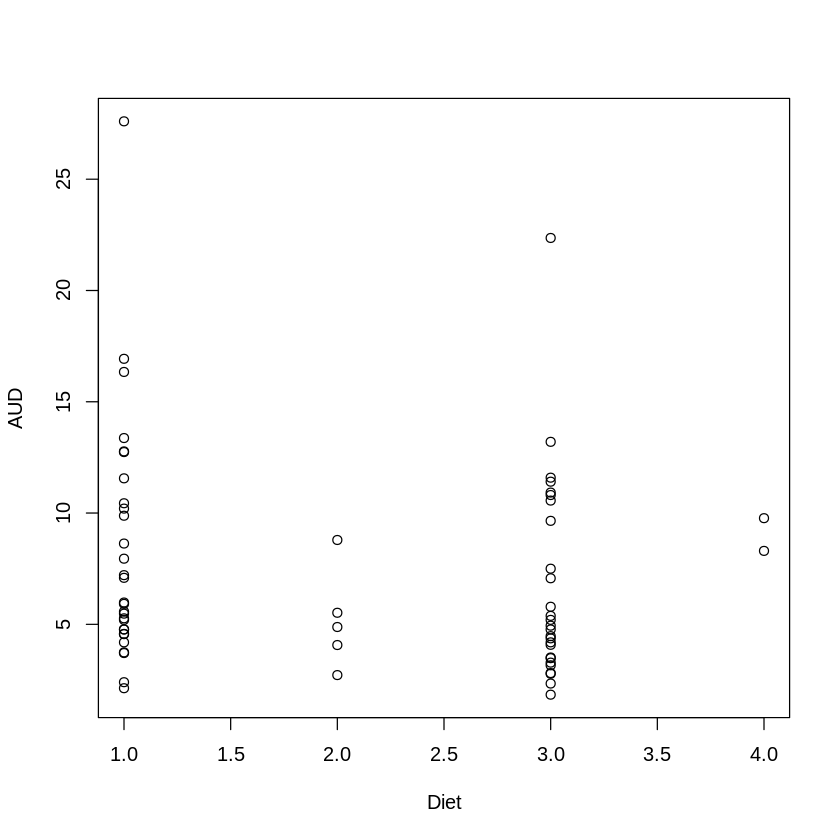

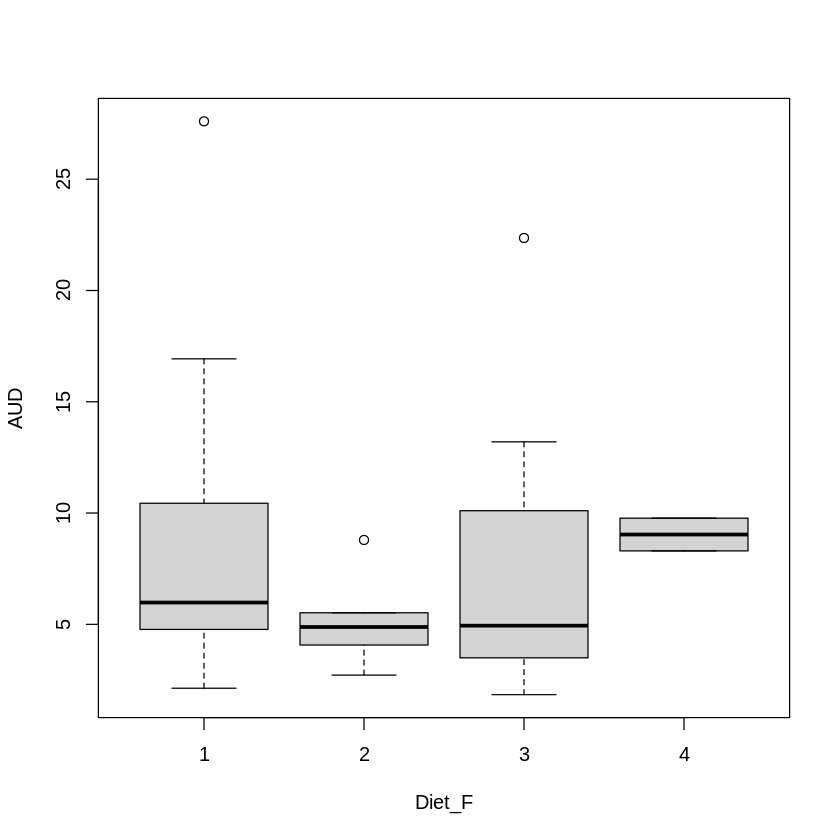

In [56]:
myData$Diet_F = as.factor(myData$Diet)
with(myData, plot(AUD~Diet))
with(myData, plot(AUD~Diet_F))

### Compare the two graphs. Which one should be looked at preferably ?

I prefered the first graph, because the categories 2 and 4 on the second graph don't show that we have few data on them compared to the others. 

### Do the regression analysis, and have a look at the anova result.

In [58]:
lm = lm(AUD~Diet_F, data=myData)
anova(lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Diet_F,3,66.06941,22.02314,0.9292727,0.4323339
Residuals,59,1398.26034,23.69933,NA,NA


### What can we conclude about the relationship linking auditory brain volume and diet? Is it surprising?

The conclusion is that we can't correlate auditory brain volume and diet, since the squared sum of residuals is way bigger than the squared sum of the model.
